In [20]:
# Installing packages

# Importing Packages
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= '0.20'

import numpy as np
import pandas as pd
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Saving graph pictures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, 'images')
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_figures(fig_id, tight_layout=True, fig_extension=".png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + fig_extension)
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [10]:
os.chdir('.')
print(os.getcwd())
print(os.listdir())

/Users/zachmortenson/Documents/GitHub/vehicle_price_prediction
['data_folder', '.DS_Store', 'images', 'prediciton.ipynb', '.ipynb_checkpoints']


# Get Data

### Retrieve data from file path

In [21]:
def get_data():
    foldersInDir = os.listdir()
    folder_name = [i for i in foldersInDir if i.__contains__('data')][0]
    data_folder_name = os.getcwd() + "/" + folder_name
    data_file_path = data_folder_name + "/" + "Car details v3.csv"
    return pd.read_csv(data_file_path)

# Exploratory Data Analysis

In [27]:
DF_car_data = get_data()
DF_car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [29]:
DF_car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [34]:
DF_car_data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [44]:
round(DF_car_data.describe(), 2)

,year,selling_price,km_driven,seats
count,8128.00,8128.00,8128.00,7907.00
mean,2013.80,638271.81,69819.51,5.42
std,4.04,806253.40,56550.55,0.96
min,1983.00,29999.00,1.00,2.00
25%,2011.00,254999.00,35000.00,5.00
50%,2015.00,450000.00,60000.00,5.00
75%,2017.00,675000.00,98000.00,5.00
max,2020.00,10000000.00,2360457.00,14.00


In [41]:
# Create a facet grid of all value counts of each variable that is an object
[DF_car_data[i].value_counts() for i in DF_car_data.columns]

[Maruti Swift Dzire VDI                             129
 Maruti Alto 800 LXI                                 82
 Maruti Alto LXi                                     71
 BMW X4 M Sport X xDrive20d                          62
 Maruti Swift VDI                                    61
                                                   ... 
 Skoda Fabia 1.4 TDI Ambiente                         1
 Mahindra Scorpio VLX 2WD AT BSIII                    1
 Renault KWID Climber 1.0 AMT                         1
 Mahindra XUV300 W8 Option Dual Tone Diesel BSIV      1
 Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV         1
 Name: name, Length: 2058, dtype: int64,
 2017    1018
 2016     859
 2018     807
 2015     776
 2013     670
 2012     651
 2014     621
 2011     592
 2019     583
 2010     394
 2009     246
 2008     214
 2007     183
 2006     124
 2005      97
 2020      74
 2004      62
 2003      49
 2002      27
 2000      22
 1999      18
 1997      11
 2001      10
 1998      10
 1996  

array([[<AxesSubplot: title={'center': 'year'}>,
        <AxesSubplot: title={'center': 'selling_price'}>],
       [<AxesSubplot: title={'center': 'km_driven'}>,
        <AxesSubplot: title={'center': 'seats'}>]], dtype=object)

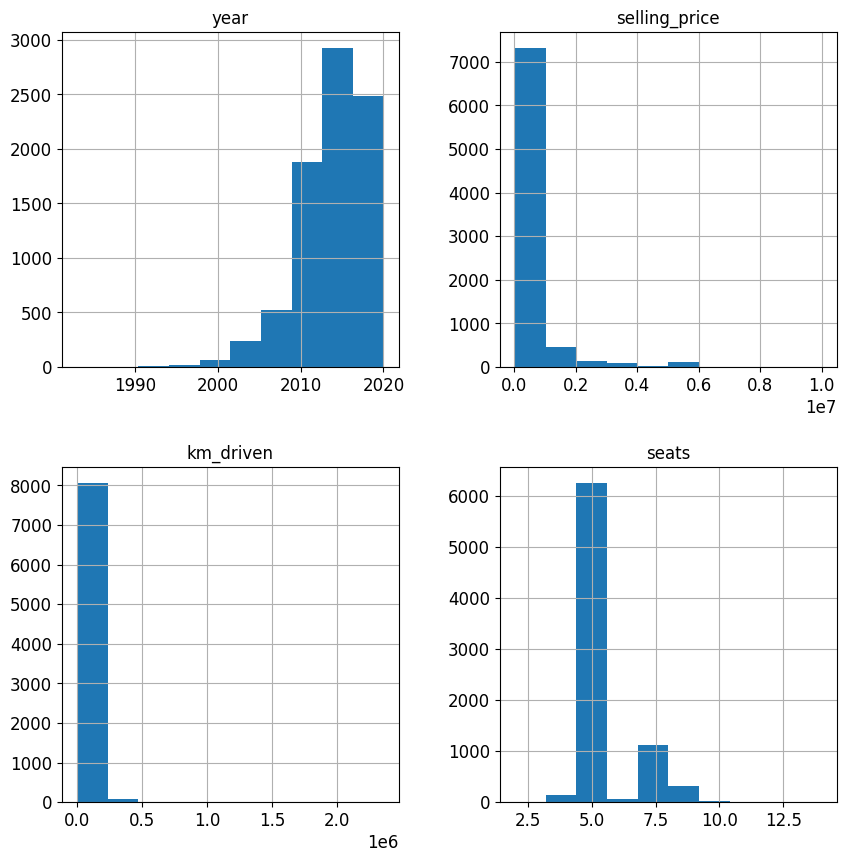

In [45]:
%matplotlib inline
DF_car_data.hist(figsize=(10,10))

# Creating a test set

In [46]:
# Random seed 
np.random.seed(180)

In [48]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(DF_car_data, test_size=.2, random_state=180)